#### Import Packages

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import psycopg2 as pg
import pprint as pp

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score, roc_curve, auc, plot_roc_curve 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import shap

### Creating new dataframe (data)
The new dataframe contains only measurements from confidence level alpha=0.5 for the MA (microaneuryms) and EX (exudate) features. The rest of the measurements for each of these features are excluded from the analysis due to redundancy in modeling as well as concern over high correlation between columns that are measuring the same features but with different parameters. 

#### Import data from psql 

In [2]:
connection_args = {'host': '52.52.92.166',
                   'user':'ubuntu', 
                   'password':'',
                   'port': 5432}

In [3]:
#Connect using database I created 

connection_args['dbname'] = 'diabetic_ret'
connection = pg.connect(**connection_args)

cursor = connection.cursor()

In [4]:
##IMPORT COLUMNS IN FROM SQL 
#Taking only 0.5 confidence interval measurement for MA and EX features 

query = "SELECT id, _0,_1,_2,_8,_16,_17,_18, Class FROM sd_data;"

#Run the query
cursor.execute(query)

#Fetch the results
results = list(cursor.fetchall())

pp.pprint(results)

[(1,
  1,
  1,
  22,
  Decimal('49.895756'),
  Decimal('0.486903'),
  Decimal('0.100025'),
  1,
  0),
 (2,
  1,
  1,
  24,
  Decimal('57.709936'),
  Decimal('0.520908'),
  Decimal('0.144414'),
  0,
  0),
 (3,
  1,
  1,
  62,
  Decimal('55.831441'),
  Decimal('0.530904'),
  Decimal('0.128548'),
  0,
  1),
 (4,
  1,
  1,
  55,
  Decimal('40.467228'),
  Decimal('0.483284'),
  Decimal('0.11479'),
  0,
  0),
 (5,
  1,
  1,
  44,
  Decimal('18.026254'),
  Decimal('0.475935'),
  Decimal('0.123572'),
  0,
  1),
 (6,
  1,
  1,
  44,
  Decimal('28.3564'),
  Decimal('0.502831'),
  Decimal('0.126741'),
  0,
  1),
 (7,
  1,
  0,
  29,
  Decimal('15.448398'),
  Decimal('0.541743'),
  Decimal('0.139575'),
  0,
  1),
 (8,
  1,
  1,
  6,
  Decimal('20.679649'),
  Decimal('0.576318'),
  Decimal('0.071071'),
  1,
  0),
 (9,
  1,
  1,
  22,
  Decimal('66.691933'),
  Decimal('0.500073'),
  Decimal('0.116793'),
  0,
  1),
 (10,
  1,
  1,
  79,
  Decimal('22.141784'),
  Decimal('0.560959'),
  Decimal('0.1091

  46,
  Decimal('34.941411'),
  Decimal('0.512276'),
  Decimal('0.104177'),
  0,
  0),
 (189,
  1,
  1,
  89,
  Decimal('54.290978'),
  Decimal('0.511842'),
  Decimal('0.113008'),
  0,
  1),
 (190,
  1,
  1,
  60,
  Decimal('65.725257'),
  Decimal('0.516642'),
  Decimal('0.094873'),
  0,
  1),
 (191,
  1,
  0,
  93,
  Decimal('19.010348'),
  Decimal('0.573597'),
  Decimal('0.092298'),
  0,
  1),
 (192,
  1,
  1,
  42,
  Decimal('168.777787'),
  Decimal('0.535815'),
  Decimal('0.097646'),
  1,
  1),
 (193,
  1,
  1,
  43,
  Decimal('18.779656'),
  Decimal('0.551409'),
  Decimal('0.102991'),
  0,
  0),
 (194,
  1,
  1,
  38,
  Decimal('20.353961'),
  Decimal('0.537429'),
  Decimal('0.123839'),
  0,
  0),
 (195,
  1,
  1,
  74,
  Decimal('51.112703'),
  Decimal('0.547192'),
  Decimal('0.082202'),
  0,
  0),
 (196,
  1,
  1,
  4,
  Decimal('76.635253'),
  Decimal('0.47722'),
  Decimal('0.12437'),
  1,
  0),
 (197,
  1,
  1,
  73,
  Decimal('32.804211'),
  Decimal('0.517979'),
  Decimal('0.

  1,
  1,
  50,
  Decimal('62.496595'),
  Decimal('0.545114'),
  Decimal('0.084103'),
  0,
  0),
 (332,
  1,
  1,
  12,
  Decimal('36.46016'),
  Decimal('0.508996'),
  Decimal('0.127779'),
  0,
  0),
 (333,
  1,
  1,
  137,
  Decimal('57.818781'),
  Decimal('0.535003'),
  Decimal('0.124646'),
  0,
  1),
 (334,
  1,
  1,
  9,
  Decimal('116.423002'),
  Decimal('0.567837'),
  Decimal('0.085624'),
  0,
  1),
 (335,
  1,
  1,
  60,
  Decimal('18.05066'),
  Decimal('0.513586'),
  Decimal('0.098916'),
  1,
  1),
 (336,
  1,
  1,
  10,
  Decimal('71.803252'),
  Decimal('0.492467'),
  Decimal('0.091044'),
  1,
  0),
 (337,
  1,
  1,
  53,
  Decimal('28.651695'),
  Decimal('0.522383'),
  Decimal('0.111349'),
  0,
  0),
 (338,
  1,
  1,
  60,
  Decimal('148.626224'),
  Decimal('0.509626'),
  Decimal('0.139369'),
  1,
  1),
 (339,
  1,
  1,
  20,
  Decimal('174.357817'),
  Decimal('0.482279'),
  Decimal('0.087487'),
  0,
  0),
 (340,
  1,
  1,
  151,
  Decimal('45.003816'),
  Decimal('0.502597'),

  Decimal('0.117596'),
  1,
  1),
 (522,
  1,
  0,
  69,
  Decimal('12.144417'),
  Decimal('0.527866'),
  Decimal('0.099809'),
  0,
  1),
 (523,
  1,
  1,
  71,
  Decimal('41.585991'),
  Decimal('0.507812'),
  Decimal('0.127995'),
  0,
  1),
 (524,
  1,
  1,
  21,
  Decimal('54.024017'),
  Decimal('0.418117'),
  Decimal('0.120417'),
  0,
  0),
 (525,
  1,
  1,
  22,
  Decimal('59.628898'),
  Decimal('0.555043'),
  Decimal('0.081757'),
  1,
  1),
 (526,
  1,
  1,
  17,
  Decimal('33.380069'),
  Decimal('0.56703'),
  Decimal('0.093799'),
  0,
  0),
 (527,
  1,
  0,
  91,
  Decimal('6.348365'),
  Decimal('0.495467'),
  Decimal('0.123818'),
  0,
  1),
 (528,
  1,
  1,
  19,
  Decimal('74.204722'),
  Decimal('0.545294'),
  Decimal('0.090406'),
  0,
  1),
 (529,
  1,
  1,
  38,
  Decimal('14.20962'),
  Decimal('0.518991'),
  Decimal('0.138125'),
  0,
  1),
 (530,
  1,
  1,
  19,
  Decimal('27.013234'),
  Decimal('0.539403'),
  Decimal('0.098043'),
  1,
  1),
 (531,
  1,
  0,
  10,
  Decimal(

 (703,
  1,
  0,
  56,
  Decimal('15.213796'),
  Decimal('0.48545'),
  Decimal('0.135686'),
  0,
  1),
 (704,
  1,
  0,
  43,
  Decimal('18.12479'),
  Decimal('0.521101'),
  Decimal('0.125329'),
  0,
  1),
 (705,
  1,
  1,
  61,
  Decimal('39.299701'),
  Decimal('0.520974'),
  Decimal('0.100231'),
  0,
  1),
 (706,
  1,
  1,
  50,
  Decimal('53.988361'),
  Decimal('0.487796'),
  Decimal('0.124642'),
  0,
  0),
 (707,
  1,
  1,
  75,
  Decimal('35.255608'),
  Decimal('0.529568'),
  Decimal('0.150923'),
  0,
  1),
 (708,
  1,
  1,
  19,
  Decimal('34.785186'),
  Decimal('0.53076'),
  Decimal('0.103929'),
  0,
  1),
 (709,
  1,
  1,
  35,
  Decimal('6.193941'),
  Decimal('0.517101'),
  Decimal('0.08457'),
  0,
  1),
 (710,
  1,
  1,
  9,
  Decimal('93.2487'),
  Decimal('0.507358'),
  Decimal('0.111949'),
  1,
  0),
 (711,
  1,
  1,
  28,
  Decimal('10.176048'),
  Decimal('0.530395'),
  Decimal('0.136675'),
  0,
  1),
 (712,
  1,
  1,
  17,
  Decimal('12.559245'),
  Decimal('0.504335'),
  

 (832,
  1,
  1,
  48,
  Decimal('15.649595'),
  Decimal('0.505156'),
  Decimal('0.087997'),
  0,
  0),
 (833,
  1,
  1,
  41,
  Decimal('123.186574'),
  Decimal('0.569552'),
  Decimal('0.109309'),
  1,
  1),
 (834,
  1,
  1,
  26,
  Decimal('27.76374'),
  Decimal('0.554947'),
  Decimal('0.115322'),
  0,
  1),
 (835,
  1,
  1,
  85,
  Decimal('43.873596'),
  Decimal('0.548025'),
  Decimal('0.107324'),
  0,
  1),
 (836,
  1,
  1,
  24,
  Decimal('114.954384'),
  Decimal('0.52384'),
  Decimal('0.111699'),
  0,
  1),
 (837,
  1,
  1,
  41,
  Decimal('8.709477'),
  Decimal('0.525264'),
  Decimal('0.091892'),
  0,
  0),
 (838,
  1,
  1,
  29,
  Decimal('40.022681'),
  Decimal('0.496496'),
  Decimal('0.09629'),
  1,
  0),
 (839,
  1,
  1,
  24,
  Decimal('11.276135'),
  Decimal('0.511507'),
  Decimal('0.122567'),
  1,
  0),
 (840,
  1,
  1,
  35,
  Decimal('13.144525'),
  Decimal('0.53342'),
  Decimal('0.130113'),
  0,
  0),
 (841,
  1,
  1,
  9,
  Decimal('12.17193'),
  Decimal('0.504977'),

 (950,
  1,
  1,
  31,
  Decimal('103.426152'),
  Decimal('0.51521'),
  Decimal('0.125708'),
  1,
  0),
 (951,
  1,
  1,
  57,
  Decimal('118.942013'),
  Decimal('0.485307'),
  Decimal('0.10979'),
  1,
  1),
 (952,
  1,
  1,
  11,
  Decimal('91.00426'),
  Decimal('0.543036'),
  Decimal('0.100434'),
  0,
  0),
 (953,
  1,
  1,
  70,
  Decimal('34.260055'),
  Decimal('0.493708'),
  Decimal('0.128698'),
  0,
  1),
 (954,
  1,
  1,
  25,
  Decimal('162.177733'),
  Decimal('0.485196'),
  Decimal('0.109256'),
  1,
  0),
 (955,
  1,
  1,
  33,
  Decimal('23.087891'),
  Decimal('0.492785'),
  Decimal('0.122442'),
  0,
  0),
 (956,
  1,
  1,
  103,
  Decimal('47.774853'),
  Decimal('0.469762'),
  Decimal('0.110646'),
  0,
  1),
 (957,
  1,
  1,
  35,
  Decimal('51.114355'),
  Decimal('0.533062'),
  Decimal('0.141816'),
  0,
  1),
 (958,
  1,
  1,
  60,
  Decimal('39.580226'),
  Decimal('0.478967'),
  Decimal('0.129397'),
  0,
  0),
 (959,
  1,
  1,
  41,
  Decimal('8.258509'),
  Decimal('0.5383

  Decimal('51.440209'),
  Decimal('0.520232'),
  Decimal('0.100426'),
  0,
  1),
 (1141,
  1,
  1,
  31,
  Decimal('22.404714'),
  Decimal('0.55572'),
  Decimal('0.109722'),
  0,
  1),
 (1142,
  1,
  1,
  53,
  Decimal('8.63201'),
  Decimal('0.551013'),
  Decimal('0.087413'),
  1,
  1),
 (1143,
  1,
  1,
  53,
  Decimal('25.283836'),
  Decimal('0.471802'),
  Decimal('0.141088'),
  0,
  0),
 (1144,
  1,
  1,
  12,
  Decimal('243.066702'),
  Decimal('0.553246'),
  Decimal('0.084022'),
  1,
  1),
 (1145,
  1,
  1,
  35,
  Decimal('2.579859'),
  Decimal('0.537551'),
  Decimal('0.124181'),
  0,
  0),
 (1146,
  1,
  1,
  16,
  Decimal('158.177307'),
  Decimal('0.533177'),
  Decimal('0.10443'),
  1,
  0),
 (1147,
  1,
  1,
  34,
  Decimal('6.071765'),
  Decimal('0.53747'),
  Decimal('0.116795'),
  0,
  0),
 (1148,
  1,
  1,
  49,
  Decimal('63.197145'),
  Decimal('0.516733'),
  Decimal('0.12419'),
  0,
  0),
 (1149,
  1,
  0,
  49,
  Decimal('30.461898'),
  Decimal('0.560632'),
  Decimal('0.1

#### Convert data into a dataframe for ease of use 

In [5]:
data=pd.DataFrame(data=results)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8
0,1,1,1,22,49.895756,0.486903,0.100025,1,0
1,2,1,1,24,57.709936,0.520908,0.144414,0,0
2,3,1,1,62,55.831441,0.530904,0.128548,0,1
3,4,1,1,55,40.467228,0.483284,0.11479,0,0
4,5,1,1,44,18.026254,0.475935,0.123572,0,1


In [7]:
data.columns=['ID','qual','abnom','MA','EX','dist','OD','AM/FM','Class']

In [8]:
data.head()

,ID,qual,abnom,MA,EX,dist,OD,AM/FM,Class
0,1,1,1,22,49.895756,0.486903,0.100025,1,0
1,2,1,1,24,57.709936,0.520908,0.144414,0,0
2,3,1,1,62,55.831441,0.530904,0.128548,0,1
3,4,1,1,55,40.467228,0.483284,0.11479,0,0
4,5,1,1,44,18.026254,0.475935,0.123572,0,1


#### Column key:

**ID**: Image ID <br>
**qual (0)**: The binary result of quality assessment. 0 = bad quality 1 = sufficient quality <br>
**abnom (1)**: The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack <br>
**MA (2)**: Number of MAs found at the confidence levels alpha = 0.5 <br>
**EX (8)**: Number of Exudates found at the confidence levels alpha = 0.5 <br>
**dist (16)**: Euclidean distance of the center of the macula and the center of the optic disc <br>
**OD (17)**: The diameter of the optic disc <br>
**AM/FM (18)**: The binary result of the AM/FM-based classification (amplitude-modulation frequency-modulation) <br>
**Class (19)**: Class label. 1 = contains signs of DR, 0 = no signs of DR 

In [9]:
data.describe()

,ID,qual,abnom,MA,AM/FM,Class
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,576.000000,0.996525,0.918332,38.428323,0.336229,0.530843
std,332.409386,0.058874,0.273977,25.620913,0.472624,0.499265
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,288.500000,1.000000,1.000000,16.000000,0.000000,0.000000
50%,576.000000,1.000000,1.000000,35.000000,0.000000,1.000000
75%,863.500000,1.000000,1.000000,55.000000,1.000000,1.000000
max,1151.000000,1.000000,1.000000,151.000000,1.000000,1.000000


In [12]:
#No Na values

data.isna().values.any()

False

### Model Optimization

Data must have variance to compute a kernel density estimate.


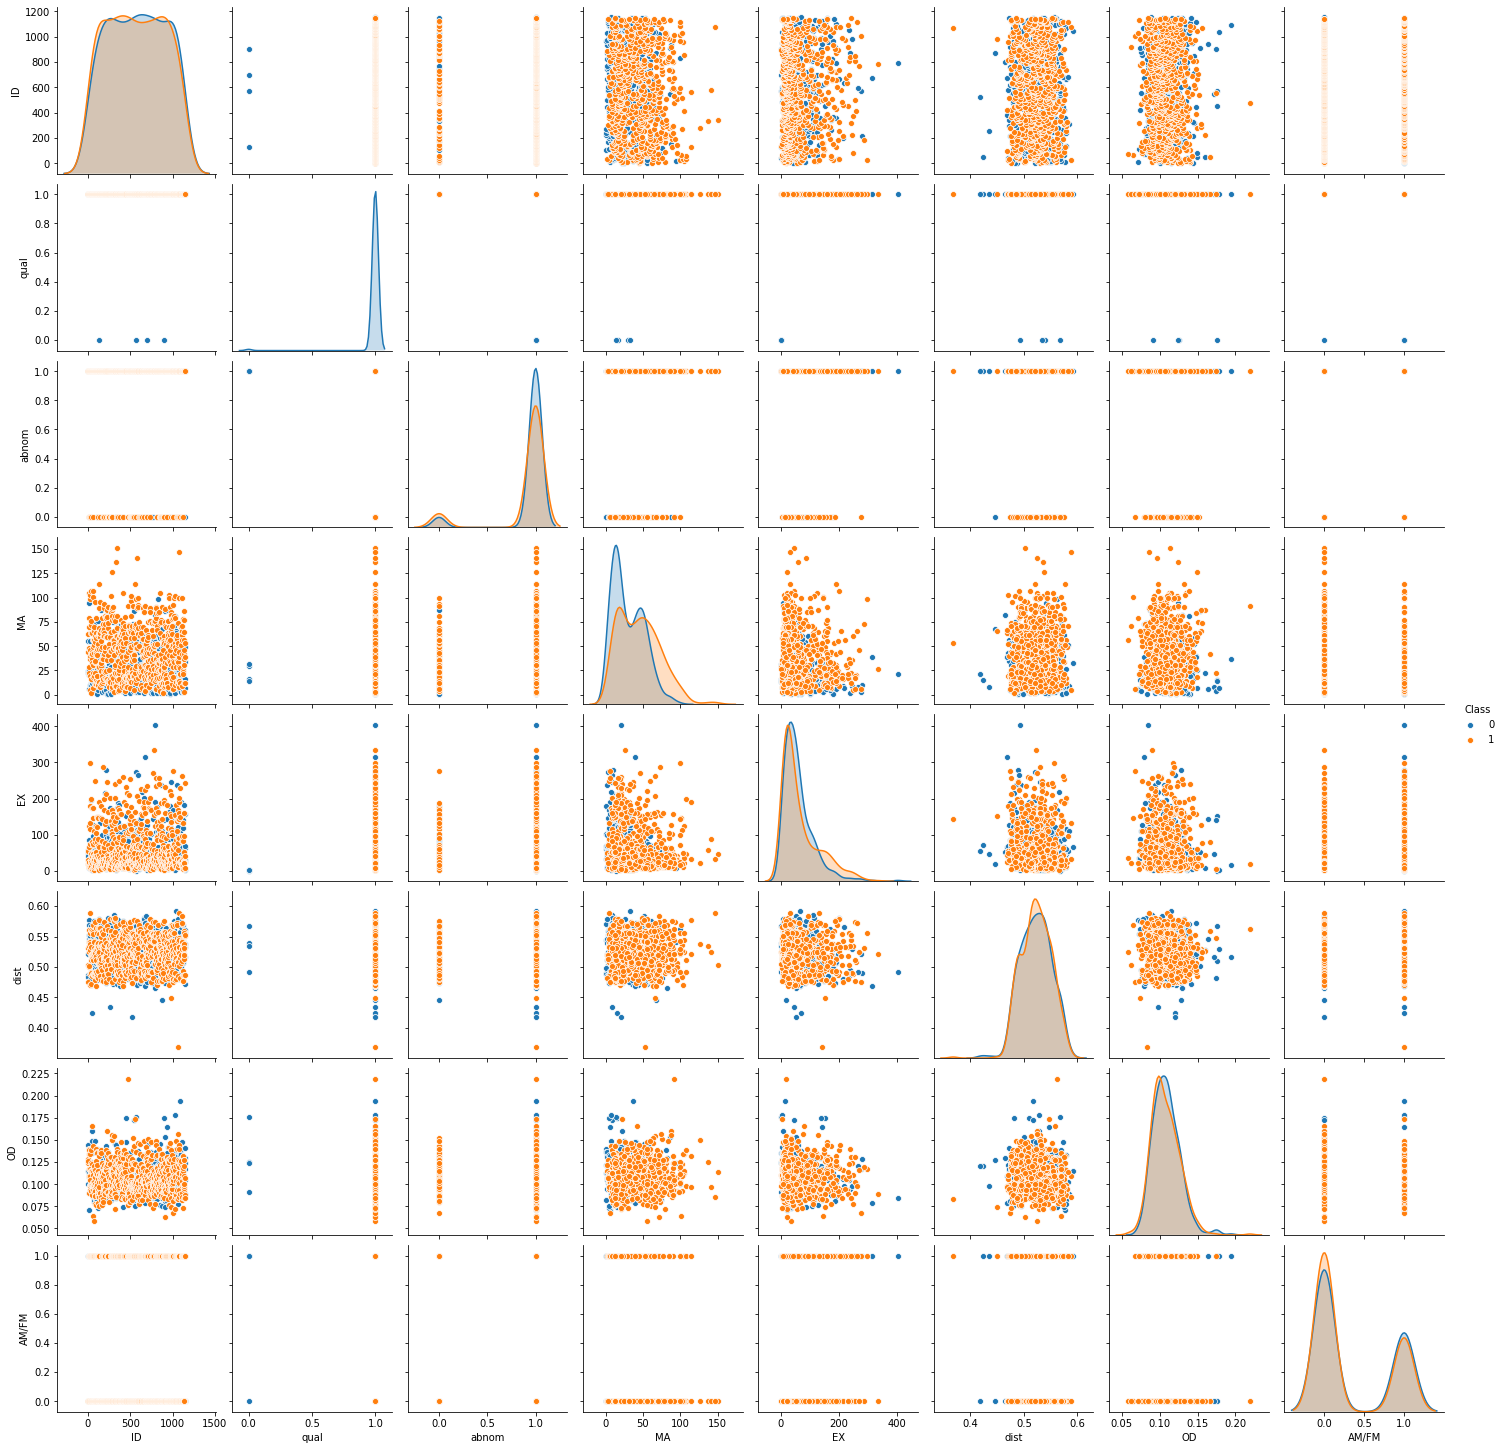

In [13]:
sns.distributions._has_statsmodels = False
fig=sns.pairplot(data, hue='Class'); 
fig.savefig("output.png")

In [10]:
#Assign X as features and Y as target 
#not using ID as a measurement

X=data.iloc[:,1:8] 
y=data.iloc[:,8]

In [15]:
X

,qual,abnom,MA,EX,dist,OD,AM/FM
0,1,1,22,49.895756,0.486903,0.100025,1
1,1,1,24,57.709936,0.520908,0.144414,0
2,1,1,62,55.831441,0.530904,0.128548,0
3,1,1,55,40.467228,0.483284,0.11479,0
4,1,1,44,18.026254,0.475935,0.123572,0
...,...,...,...,...,...,...,...
1146,1,1,34,6.071765,0.53747,0.116795,0
1147,1,1,49,63.197145,0.516733,0.12419,0
1148,1,0,49,30.461898,0.560632,0.129843,0
1149,1,1,39,40.525739,0.485972,0.10669,1


#### Split data into train and test set 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [12]:
#Logistic regression-baseline model

#liblinear means regularization is applied-good for small datasets
#C of 1 is default

#fit model on training data
lm = LogisticRegression(solver= 'liblinear', C=1)
lm.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}%".format(100*lm.score(X_train, y_train)))

#predict y values based off model 
y_predict = lm.predict(X_test)

#print testing accuracy of x and y test data
print("Testing accuracy score: {:6.4f}%".format(100*lm.score(X_test, y_test)))

#How well did the model predict?
#f beta score 
print("F1-score of actual y and predictions: {:6.4f}".format(fbeta_score(y_test, y_predict, beta=1)))

#Recall and precision
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Training accuracy score: 63.3696%
Testing accuracy score: 64.0693%
F1-score of actual y and predictions: 0.6667
Precision score: 0.6860,   Recall score: 0.6484


In [13]:
#Weigh recall more than precision 

fbeta_score(y_test, y_predict, beta=1.5)

0.6595354523227385

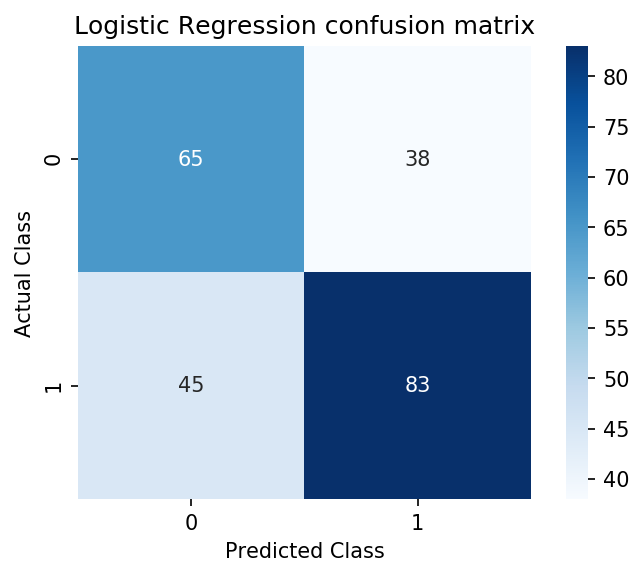

In [14]:
logistic_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=150)
sns.heatmap(logistic_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Logistic Regression confusion matrix');

plt.savefig("cm_logreg")

In [15]:
#ROC SCORE

roc_auc_score(y_test, y_predict)

0.6397527305825242

In [16]:
#Logistic regression with 10 fold cross validation: 

from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
model_kfold = LogisticRegression(max_iter=1000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 63.08%


#### Gridsearch CV for Logistic Regression

In [17]:
# Create pipeline

pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(0,9,1))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:   12.6s finished


In [18]:
best_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                          

In [19]:
#With Gridsearch CV results

lm2=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs= -1,
                                                           penalty='l2',
                                                           random_state=None,
                                                           solver='lbfgs',
                                                           tol=0.0001,
                                                           verbose=0,
                                                           warm_start=False)


lm2.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}%".format(100*lm2.score(X_train, y_train)))

#predict y values based off model 
y_predict3 = lm2.predict(X_test)

#print testing accuracy of x and y test data
print("Testing accuracy score: {:6.4f}%".format(100*lm2.score(X_test, y_test)))

#How well did the model predict?
#f1_score(y_test, y_predict)
print("F-score of actual y and predictions: {:6.4f}".format(f1_score(y_test, y_predict3)))


Training accuracy score: 63.3696%
Testing accuracy score: 62.7706%
F-score of actual y and predictions: 0.6532


In [20]:
#fbeta score 
fbeta_score(y_test, y_predict3, beta=1.5)

0.6452205882352942

In [21]:
#ROC SCORE

roc_auc_score(y_test, y_predict3)

0.6270858616504854

#### Random Forest 

In [22]:
#Random Forest Classifer baseline model

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}".format(rf.score(X_train, y_train)))
print("Testing accuracy score: {:6.4f}".format(rf.score(X_test, y_test)))

y1_predict = rf.predict(X_test)

#f1_score(y_test, y_predict)
print("Test F-score: {:6.4f}".format(f1_score(y_test, y1_predict)))

Training accuracy score: 0.7033
Testing accuracy score: 0.6147
Test F-score: 0.6337


In [23]:
#fbeta score 
fbeta_score(y_test, y1_predict, beta=1.5)

0.6209677419354839

In [24]:
roc_auc_score(y_test, y1_predict)

0.6163152305825242

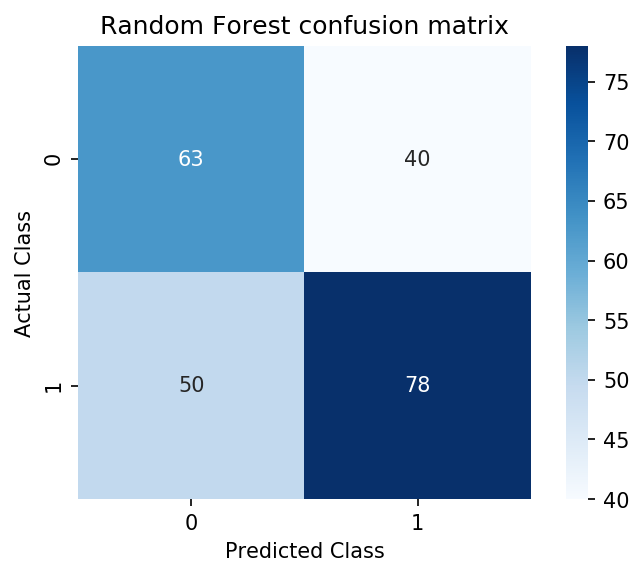

In [30]:
random_confusion = confusion_matrix(y_test, y1_predict)
plt.figure(dpi=150)
sns.heatmap(random_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Random Forest confusion matrix');

plt.savefig("cm_random")

#### Gridsearch CV for Random Forest 

In [25]:
# Running RandomForest to find optimal parameters

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(0,9,1))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:   11.5s finished


In [26]:
best_clf.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=5,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [40]:
#With Gridsearch CV results

rf2=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=3, max_features=6,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=60, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)
    
rf2.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}".format(rf2.score(X_train, y_train)))

y_predict2 = rf2.predict(X_test)

print("Test Fbeta-score: {:6.4f}".format(fbeta_score(y_test, y_predict2, beta=1.5))) 
print("Testing accuracy score: {:6.4f}".format(rf2.score(X_test, y_test)))

Training accuracy score: 0.6717
Test Fbeta-score: 0.5690
Testing accuracy score: 0.6320


In [28]:
#Recall and precision
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, y_predict2), 
                                                     recall_score(y_test, y_predict2)))

Precision score: 0.7204,   Recall score: 0.5234


In [29]:
roc_auc_score(y_test, y_predict2)

0.6355051577669902

#### Naive Bayes-can't use this model

In [35]:
#Naive Bayes Classifer 
#Gaussian Naive Bayes only works for continuous data so I can't use this 

nb = GaussianNB()
nb.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}".format(nb.score(X_train, y_train)))
print("Testing accuracy score: {:6.4f}".format(nb.score(X_test, y_test)))


y2_predict = nb.predict(X_test)

#f1_score(y_test, y_predict)

print("Test F1-score: {:6.4f}".format(f1_score(y_test, y2_predict)))

confusion_matrix(y_test, y2_predict)

Training accuracy score: 0.5283
Testing accuracy score: 0.5584
Test F1-score: 0.7151


array([[  1, 102],
       [  0, 128]])

In [36]:
roc_auc_score(y_test, y2_predict)

0.5048543689320388

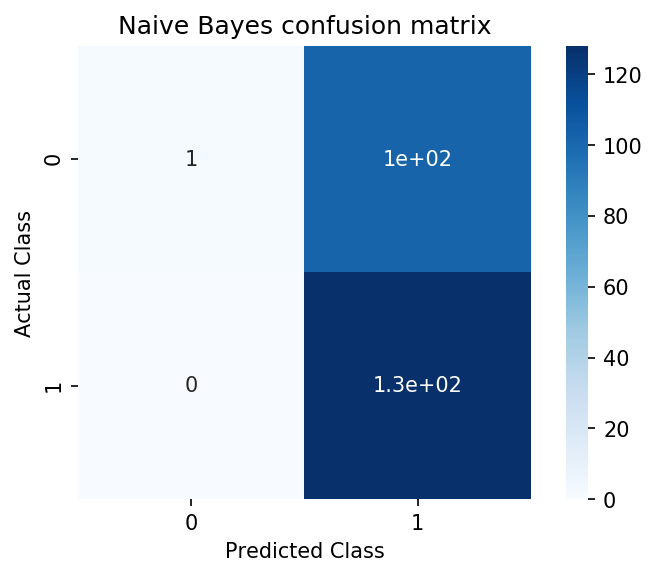

In [37]:
naive_confusion = confusion_matrix(y_test, y2_predict)
plt.figure(dpi=150)
sns.heatmap(naive_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=[0,1],
           yticklabels=[0,1])

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Naive Bayes confusion matrix');

plt.savefig("cm_naive")

#### Linear Support Vector Machines

In [40]:
#Linear Support Vector Machines

lsvc = LinearSVC(C=10000)
lsvc.fit(X_train, y_train)
print("Training accuracy score: {:6.4f}".format(lsvc.score(X_train, y_train)))
print("Testing accuracy score: {:6.4f}".format(lsvc.score(X_test, y_test)))

#f beta score 

y3_predict = lsvc.predict(X_test)

#f1_score(y_test, y_predict)

print("Test Fbeta-score: {:6.4f}".format(fbeta_score(y_test, y3_predict, beta=1.5)))

Training accuracy score: 0.5304
Testing accuracy score: 0.5584
Test Fbeta-score: 0.8031


Liblinear failed to converge, increase the number of iterations.


In [41]:
roc_auc_score(y_test, y3_predict)

0.5048543689320388

### Ensemble Methods

In [30]:
#Ensemble Logistic Regression and Random Forest

from sklearn.ensemble import VotingClassifier
model1 = lm
model2 = rf2

model = VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='hard')
model.fit(X_train,y_train)

#Accuracy score 
model.score(X_test,y_test)

0.6406926406926406

In [31]:
#F-score: 

y_pred=model.predict(X_test)
print("Test Fbeta-score: {:6.4f}".format(fbeta_score(y_test, y_pred, beta=1)))

Test Fbeta-score: 0.6103


In [32]:
#Recall and precision
print("Precision score: {:6.4f},   Recall score: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred)))

Precision score: 0.7647,   Recall score: 0.5078


In [33]:
fbeta_score(y_test, y_pred, beta=1.5)

0.5663538873994638

In [34]:
#ROC score 
roc_auc_score(y_test, y_pred)

0.6568188713592232

#### Plot multiple ROC_AUC curves in one graph

In [37]:
# Instantiate the classfiers and make a list

classifiers = [lm, 
               rf2,
              VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='soft')]

# Define a result table as a DataFrame

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels

result_table.set_index('classifiers', inplace=True)

In [38]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.009708737864077669, 0.009708...","[0.0, 0.0078125, 0.0625, 0.0625, 0.078125, 0.0...",0.672558
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.019417475728155338, 0.019417...","[0.0, 0.0078125, 0.03125, 0.03125, 0.0390625, ...",0.695654
VotingClassifier,"[0.0, 0.0, 0.0, 0.009708737864077669, 0.009708...","[0.0, 0.0078125, 0.0390625, 0.0390625, 0.05468...",0.685073


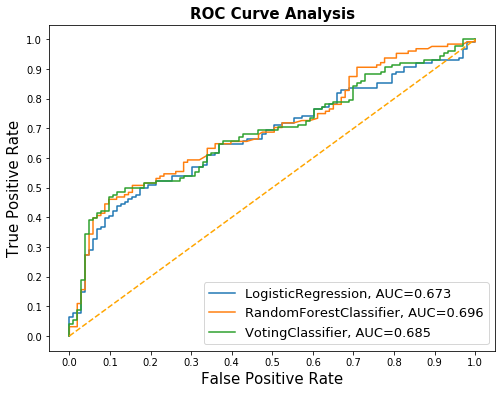

In [39]:
#Plot three ROC Curves (LR, NB, RF)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

fig.savefig('ROC_curve.png')

#### Conclusion: 
Choosing **Random Forest** model as best model for this subset of features

#### Summary:
Accuracy score: **63%** <br>
F-beta (1.5) score: **0.568** <br>
Precision score: **0.733** <br>
Recall score: **0.516** <br>
ROC_AUC score: **0.641**


#### Feature Importance 

Feature: 0, Score: 0.10888
Feature: 1, Score: -0.78686
Feature: 2, Score: 0.03156
Feature: 3, Score: 0.00512
Feature: 4, Score: -0.08407
Feature: 5, Score: -0.27854
Feature: 6, Score: 0.15832


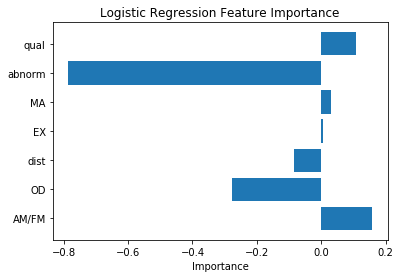

In [51]:
#Feature importance for logistic regression

importance = lm.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance

fig, ax = plt.subplots()

features = ('qual', 'abnorm', 'MA', 'EX', 'dist','OD', 'AM/FM')
y_pos = np.arange(len(features))

ax.barh([x for x in range(len(importance))], importance)

ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Logistic Regression Feature Importance')

#plt.show()

plt.savefig('Log_Feat_imp.png')

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.01023
Feature: 2, Score: 0.63622
Feature: 3, Score: 0.27468
Feature: 4, Score: 0.03848
Feature: 5, Score: 0.03482
Feature: 6, Score: 0.00556


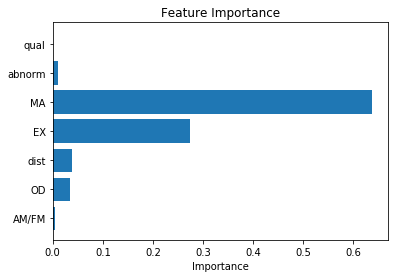

In [52]:
#Feature importance for random forest 

importance = rf2.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots()

features = ('qual', 'abnorm', 'MA', 'EX', 'dist','OD', 'AM/FM')
y_pos = np.arange(len(features))

ax.barh([x for x in range(len(importance))], importance)

ax.set_yticks(y_pos)
ax.set_yticklabels(features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')

#plt.show()
plt.savefig('Feat_imp.png')